In [139]:
import numpy as np 
import pandas as pd 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import OneHotEncoder
from matplotlib.colors import ListedColormap  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### Combining data

In [119]:
df1 = pd.read_csv('Features_0.csv', delimiter=';')
df2 = pd.read_csv('Features_2.csv', delimiter=';')
df3 = pd.read_csv('Features_4.csv', delimiter=';')
df4 = pd.read_csv('Features_6.csv', delimiter=';')
df5 = pd.read_csv('Features_8.csv', delimiter=';')
df6 = pd.read_csv('Features_10.csv', delimiter=';')
df7 = pd.read_csv('Features_12.csv', delimiter=';')
df8 = pd.read_csv('Features_14.csv', delimiter=';')
target = pd.read_csv('Targets.csv', delimiter=';')
hd = pd.read_csv('Half Data Frame.csv', delimiter=';', header = None)
dataset = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], axis=1)
dataset.head()

,Integer,Categorical,Numerical,Numerical.1,Categorical.1,Categorical.2,Categorical.3,Categorical.4,Categorical.5,Categorical.6,Categorical.7,Numerical.2,Ordinal,Ordinal.1,Categorical.8,Categorical.9
0,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR
1,1,A1,82.12266582245866,1.0,1,4,6,2,10,0,0,50.0,0,0,0,NaN
2,2,A1,-180534.4656684687,1.0,5,1,10,6,10,3,1,75.0,1,1,0,1
3,3,A1,1193.589181254818,1.0,5,1,NaN,6,10,3,4,75.0,1,1,0,1
4,4,A1,629.8641463331805,1.0,5,0,6,10,2,3,4,25.0,0,0,0,1


In [120]:
hd.columns = ['ID', 'Motorway', 'SR', 'NR', 'TR', 'VR', 'SUR1', 'SUR2', 'SUR3', 'UR', 'FR', 'OR','RR','BR', 'MR','CR']
dataset = pd.concat([dataset, hd], axis=0)
dataset.reset_index(inplace=True, drop=True)
dataset = pd.read_csv('New Dataset.csv')
dataset = pd.concat([dataset, target], axis=1)
dataset.head()

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Label 1,Label 2,Label 3,Label 4,Label 5,Label 6,Label 7
0,1.0,A1,82.122666,1.0,1.0,4.0,6.0,2.0,10.0,0.0,...,0.0,0,NaN,Green Frogs,Brown Frogs,Common Toad,Fire-Bellied Toad,Tree Frog,Common Newt,Great Crested Newt
1,2.0,A1,-180534.465700,1.0,5.0,1.0,10.0,6.0,10.0,3.0,...,1.0,0,1.0,0,0,0,0,0,0,0
2,3.0,A1,1193.589181,1.0,5.0,1.0,NaN,6.0,10.0,3.0,...,1.0,0,1.0,0,1,1,0,0,1,0
3,4.0,A1,629.864146,1.0,5.0,0.0,6.0,10.0,2.0,3.0,...,0.0,0,1.0,0,1,1,0,0,1,0
4,5.0,A1,-180803.798800,2.0,1.0,4.0,NaN,2.0,6.0,0.0,...,5.0,0,1.0,0,0,1,0,0,0,0


In [121]:
dataset.isnull().sum()

ID           1
Motorway     1
SR           1
NR           1
TR           1
VR           1
SUR1        95
SUR2         1
SUR3         1
UR          38
FR           1
OR           1
RR          32
BR           1
MR           1
CR          21
Label 1      0
Label 2      0
Label 3      0
Label 4      0
Label 5      0
Label 6      0
Label 7      0
dtype: int64

In [122]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(dataset)
dataset.iloc[:,:] = imputer.transform(dataset)

In [123]:
dataset.head()

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Label 1,Label 2,Label 3,Label 4,Label 5,Label 6,Label 7
0,1.0,A1,82.122666,1.0,1.0,4.0,6.0,2.0,10.0,0.0,...,0.0,0,1.0,Green Frogs,Brown Frogs,Common Toad,Fire-Bellied Toad,Tree Frog,Common Newt,Great Crested Newt
1,2.0,A1,-180534.465700,1.0,5.0,1.0,10.0,6.0,10.0,3.0,...,1.0,0,1.0,0,0,0,0,0,0,0
2,3.0,A1,1193.589181,1.0,5.0,1.0,2.0,6.0,10.0,3.0,...,1.0,0,1.0,0,1,1,0,0,1,0
3,4.0,A1,629.864146,1.0,5.0,0.0,6.0,10.0,2.0,3.0,...,0.0,0,1.0,0,1,1,0,0,1,0
4,5.0,A1,-180803.798800,2.0,1.0,4.0,2.0,2.0,6.0,0.0,...,5.0,0,1.0,0,0,1,0,0,0,0


In [124]:
print(dataset)

        ID Motorway             SR   NR    TR   VR  SUR1  SUR2  SUR3   UR  \
0      1.0       A1      82.122666  1.0   1.0  4.0   6.0   2.0  10.0  0.0   
1      2.0       A1 -180534.465700  1.0   5.0  1.0  10.0   6.0  10.0  3.0   
2      3.0       A1    1193.589181  1.0   5.0  1.0   2.0   6.0  10.0  3.0   
3      4.0       A1     629.864146  1.0   5.0  0.0   6.0  10.0   2.0  3.0   
4      5.0       A1 -180803.798800  2.0   1.0  4.0   2.0   2.0   6.0  0.0   
..     ...      ...            ...  ...   ...  ...   ...   ...   ...  ...   
192  193.0       A1     164.442663  1.0  14.0  2.0   1.0   2.0   7.0  0.0   
193  194.0      S52    -866.209002  1.0  12.0  2.0  10.0  10.0   2.0  0.0   
194  195.0      S52   27369.210340  3.0   1.0  2.0  10.0   6.0   1.0  3.0   
195  196.0      S52     889.098487  1.0   1.0  4.0   9.0   2.0  10.0  0.0   
196    1.0      S52   -2568.296384  1.0   1.0  1.0   2.0  10.0   6.0  0.0   

     ...   BR  MR   CR      Label 1      Label 2      Label 3  \
0    ...  

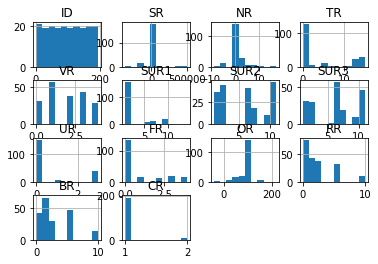

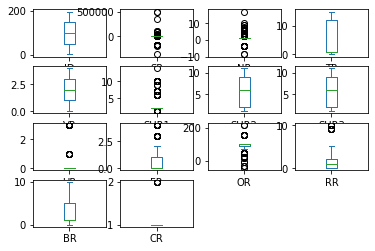

In [126]:
dataset.hist()
plt.show()
dataset.plot(kind='box', subplots=True, layout=(4,4))
plt.show()

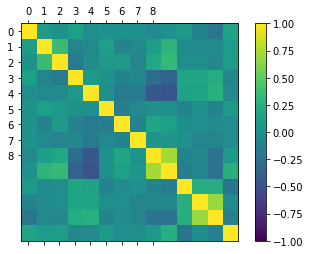

In [127]:
correlations = dataset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

In [143]:
X = dataset.iloc[:, 3:12]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [145]:
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2*100)

Confusion Matrix:
[[49  1  0]
 [ 9  0  0]
 [ 1  0  0]]
Classification Report:
                    precision    recall  f1-score   support

                 0       0.83      0.98      0.90        50
                 1       0.00      0.00      0.00         9
Great Crested Newt       0.00      0.00      0.00         1

          accuracy                           0.82        60
         macro avg       0.28      0.33      0.30        60
      weighted avg       0.69      0.82      0.75        60

Accuracy: 81.66666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
